In [23]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
FastCover = pd.read_csv("FastCover/results/scalefree/justprob/FastCoverResults_scalefree.txt", header = None)
#FastCover = pd.read_csv("FastCover/results/paper/FastCoverResults_MDH_erdos.txt", header = None)
FastCover.columns = ["graph", "n_covered","t_mean","n"]
FastCover["model"] = "GRAT"
FastCover = FastCover[["graph", "model","n_covered", "n", "t_mean"]]
FastCover.head()

,graph,model,n_covered,n,t_mean
0,graph_football,GRAT,32,115,0.000
1,graph_jazz,GRAT,37,198,0.000
2,graph_karate,GRAT,9,62,0.000
3,graph_CA-CondMat,GRAT,3160,23133,0.480
4,gemsec_facebook_artist,GRAT,1699,50515,0.577


In [25]:
models = ['GAT', "GCN", "GraphConv", "SAGE"]
Full = pd.DataFrame()

for model in models:
    GNN = pd.read_csv(f"Models/results/scalefree/justprob/{model}Results_scalefree.txt", header = None)
    #GNN = pd.read_csv(f"Models/results/paper/{model}Results_MDH_erdos.txt", header = None)
    
    GNN.columns = ["graph", "n_covered","t_mean","n"]
    GNN["model"] = model
    GNN = GNN[["graph", "model","n_covered", "n", "t_mean"]]
    
    Full = pd.concat([Full, GNN])
Full.head()

,graph,model,n_covered,n,t_mean
0,graph_football,GAT,37,115,0.000
1,graph_jazz,GAT,84,198,0.004
2,graph_karate,GAT,15,62,0.000
3,graph_CA-CondMat,GAT,8124,23133,1.888
4,gemsec_facebook_artist,GAT,20032,50515,7.927


In [26]:
MDH = pd.read_csv(f"MDH/MDHResults.txt", header = None)
MDH.columns = ["graph", "n_covered","t_mean","n"]
MDH["model"] = 'MDH'
MDH = MDH[["graph", "model","n_covered", "n", "t_mean"]]
MDH.head()

,graph,model,n_covered,n,t_mean
0,graph_football,MDH,31,115,0.000
1,graph_jazz,MDH,31,198,0.002
2,graph_karate,MDH,8,62,0.000
3,graph_CA-CondMat,MDH,2938,23133,0.754
4,gemsec_facebook_artist,MDH,790,50515,0.400


In [34]:
Full = pd.concat([Full, MDH, FastCover])
Full['ratio'] =  Full.n_covered/Full.n
Full = Full.drop_duplicates(subset=['model', 'graph'], keep='last')

In [35]:
Full = Full.sort_values(by=['n'])
Full

,graph,model,n_covered,n,t_mean,ratio
12,graph_dolphins,GraphConv,13,34,0.000,0.382353
12,graph_dolphins,GAT,12,34,0.000,0.352941
12,graph_dolphins,MDH,3,34,0.000,0.088235
12,graph_dolphins,GRAT,4,34,0.000,0.117647
2,graph_karate,GAT,15,62,0.000,0.241935
...,...,...,...,...,...,...
23,com-youtube.ungraph,MDH,39090,1134890,317.299,0.034444
23,com-youtube.ungraph,GraphConv,237831,1134890,1093.651,0.209563
23,com-youtube.ungraph,GCN,319859,1134890,3030.602,0.281841
23,com-youtube.ungraph,GRAT,65794,1134890,62.537,0.057974


In [36]:
Full.model.count()

151

In [37]:
fig = px.histogram(Full, x="graph", y="n_covered",
             color='model', barmode='group',
             height=400)
fig.show()

In [38]:
Full.groupby(by = "model").mean().sort_values(by=['ratio'])

C:\Users\Jairo Enrique\AppData\Local\Temp\ipykernel_17244\1843624887.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,n_covered,n,t_mean,ratio
model,,,,
MDH,8535.518519,126984.777778,25.929741,0.095638
GRAT,10794.888889,126984.777778,11.097704,0.123316
SAGE,31015.750000,170246.500000,94.712400,0.160935
GraphConv,31603.538462,131864.384615,66.714731,0.310163
GAT,44224.115385,131864.384615,191.852692,0.338407
GCN,42548.040000,137137.600000,170.006880,0.412259


In [39]:
print(Full.shape)
#Full = Full.drop_duplicates(subset=['n_covered'], keep = False)
Full.shape

(151, 6)


(151, 6)

In [40]:
Full

,graph,model,n_covered,n,t_mean,ratio
12,graph_dolphins,GraphConv,13,34,0.000,0.382353
12,graph_dolphins,GAT,12,34,0.000,0.352941
12,graph_dolphins,MDH,3,34,0.000,0.088235
12,graph_dolphins,GRAT,4,34,0.000,0.117647
2,graph_karate,GAT,15,62,0.000,0.241935
...,...,...,...,...,...,...
23,com-youtube.ungraph,MDH,39090,1134890,317.299,0.034444
23,com-youtube.ungraph,GraphConv,237831,1134890,1093.651,0.209563
23,com-youtube.ungraph,GCN,319859,1134890,3030.602,0.281841
23,com-youtube.ungraph,GRAT,65794,1134890,62.537,0.057974


## Por mejor solución

In [41]:
models_name = Full.model.unique()
Dict = {m: i for m, i in zip(models_name, np.arange(models_name.shape[0]))}

MT = np.zeros((models_name.shape[0], models_name.shape[0]))
for graph in Full.graph.unique():
    
    Temp = np.array(Full.query(f"graph == '{graph}'").sort_values(by = "ratio", ascending = False).model)
    
    for m in range(Temp.shape[0]):

        if (m + 1) == Temp.shape[0]:
            MT[ Dict[ Temp[m] ] ][ Dict[ Temp[m] ] ] += 1
            continue
        
        for j in range(m + 1, Temp.shape[0]):
            MT[ Dict[ Temp[m] ] ][ Dict[ Temp[j] ] ] += 1
        

MT_ = MT / np.expand_dims(np.sum(MT, axis = 1), 1)
# La por filas siempre debe de dar 1 y para la probabilidad de estado estacionario, 
# se hace la transpuesta, es decir, las columnas son las deben sumar 1
MT_.sum(1)

array([1., 1., 1., 1., 1., 1.])

In [42]:
SPD_best = np.ones(MT_.shape[0])/MT_.shape[0] # initial distirbution
for _ in range(200):
    SPD_best = np.dot(MT_.T, SPD_best)
print(np.round(SPD_best,3), '\n',models_name)

[0.002 0.001 0.942 0.016 0.    0.039] 
 ['GraphConv' 'GAT' 'MDH' 'GRAT' 'GCN' 'SAGE']


In [43]:
# Obtenemos el mínimo porque 
models_name[np.argsort(-SPD_best)]

array(['MDH', 'SAGE', 'GRAT', 'GraphConv', 'GAT', 'GCN'], dtype=object)

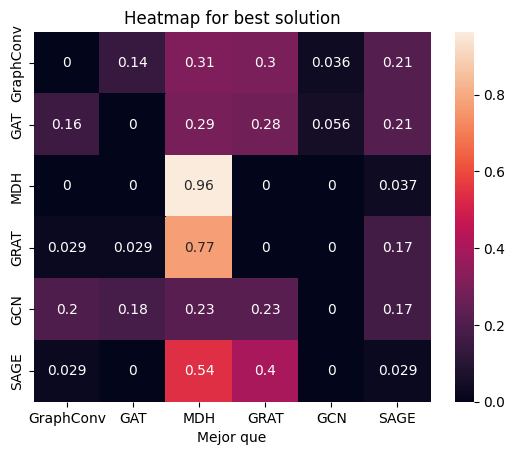

In [44]:
sns.heatmap(MT_, annot = True, xticklabels = models_name, yticklabels = models_name)
plt.title("Heatmap for best solution")
plt.xlabel("Mejor que");

## Por tiempo

In [45]:
MT = np.zeros((models_name.shape[0], models_name.shape[0]))
for graph in Full.graph.unique():
    Temp = np.array(Full.query(f"graph == '{graph}'").sort_values(by = "t_mean", ascending=False).model)
    for m in range(Temp.shape[0]):

        if (m + 1) == Temp.shape[0]:
            MT[ Dict[ Temp[m] ] ][ Dict[ Temp[m] ] ] += 1
            continue
        MT[ Dict[ Temp[m] ] ][ Dict[ Temp[m + 1] ] ] += 1

MT_ = MT / np.expand_dims(np.sum(MT, axis = 1), 1)
# La por filas siempre debe de dar 1 y para la probabilidad de estado estacionario, 
# se hace la transpuesta, es decir, las columnas son las deben sumar 1
MT_.sum(1)

array([1., 1., 1., 1., 1., 1.])

In [46]:
SPD_time = np.ones(MT_.shape[0])/MT_.shape[0] # initial distirbution
for _ in range(100):
    SPD_time = np.dot(MT_.T, SPD_time)
print(np.round(SPD_time,5), '\n',models_name)

[0.10134 0.02453 0.25904 0.44536 0.02289 0.14684] 
 ['GraphConv' 'GAT' 'MDH' 'GRAT' 'GCN' 'SAGE']


In [47]:
models_name[np.argsort(-SPD_time)]

array(['GRAT', 'MDH', 'SAGE', 'GraphConv', 'GAT', 'GCN'], dtype=object)

Text(0.5, 1.0, 'Heatmap for fastest solution')

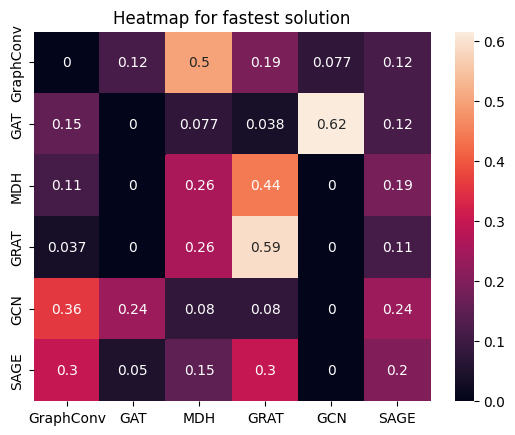

In [48]:
sns.heatmap(MT_, annot = True, xticklabels = models_name, yticklabels = models_name)
plt.title("Heatmap for fastest solution")

## All together

In [49]:
print("---- Best solution ----\n")
c = 1
for g in np.argsort(-SPD_best):
    print(c," - ", models_name[g][:6], f" \t {SPD_best[g]:.3f}")
    c += 1

---- Best solution ----

1  -  MDH  	 0.942
2  -  SAGE  	 0.039
3  -  GRAT  	 0.016
4  -  GraphC  	 0.002
5  -  GAT  	 0.001
6  -  GCN  	 0.000


In [50]:
print("------ Best time ------\n")
c = 1
for g in np.argsort(-SPD_time):
    print(c," - ", models_name[g][:6], f" \t {SPD_time[g]:.3f}")
    c+=1

------ Best time ------

1  -  GRAT  	 0.445
2  -  MDH  	 0.259
3  -  SAGE  	 0.147
4  -  GraphC  	 0.101
5  -  GAT  	 0.025
6  -  GCN  	 0.023


In [301]:
import numpy as np
x = np.array([[6.5,7], [5,3],[6,6],[7.5,8.2],[4,4], [6,7], [5,5], [5.1,5.2], [7,8], [8,8], [8,8]])
x = np.append(np.ones((11,1)),x, axis = 1)
y = np.array([6,8,7,2.5,4,10,5,7,4,12,4])

In [3]:
x

array([[1. , 6.5, 7. ],
       [1. , 5. , 3. ],
       [1. , 6. , 6. ],
       [1. , 7.5, 8.2],
       [1. , 4. , 4. ],
       [1. , 6. , 7. ],
       [1. , 5. , 5. ],
       [1. , 5.1, 5.2],
       [1. , 7. , 8. ],
       [1. , 8. , 8. ],
       [1. , 8. , 8. ]])

In [4]:
np.dot(x.T, x)

array([[ 11.  ,  68.1 ,  69.4 ],
       [ 68.1 , 439.51, 451.52],
       [ 69.4 , 451.52, 470.28]])

In [73]:
np.linalg.inv(np.dot(x.T, x))

array([[ 2.50477748, -0.61285329,  0.21877171],
       [-0.61285329,  0.31657017, -0.21350205],
       [ 0.21877171, -0.21350205,  0.1748271 ]])

In [74]:
np.dot(x.T,y)

array([ 69.5 , 432.45, 435.9 ])

In [5]:
B = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T,y))
B

array([ 4.41621859,  1.24192201, -0.91719443])

In [80]:
SST = np.dot(y,y) - (np.sum(y)**2)/11
SST

82.13636363636363

In [84]:
np.dot(B, np.dot(x.T,y))

444.19131364903933

In [81]:
SSE = np.dot(y,y) - np.dot(B, np.dot(x.T,y))
SSE

77.05868635096067

In [83]:
SSReg = SST - SSE
SSReg

5.077677285402956

In [90]:
np.dot(B, [1,10,10])

7.663494397900552

In [15]:
import torch
torch.sigmoid(torch.tensor([100]))

tensor([1.])